## Eisenthal-Cornish-Bowden Direct Linear Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
style.use('ggplot')
import ipywidgets as ipyw
import qgrid


In [117]:
#@title Example data (uncomment)
# Example data
# x = np.array([[ 1.   , -1.003,  6.868,  4.254],
#               [ 6.   , 24.747, 27.017, 25.237],
#               [11.   , 36.619, 38.776, 42.157],
#               [16.   , 39.641, 43.188, 48.65 ],
#               [21.   , 47.674, 50.211, 53.12 ],
#               [26.   , 53.475, 56.319, 48.891],
#               [31.   , 57.83 , 55.559, 57.094],
#               [36.   , 58.634, 57.599, 55.835],
#               [41.   , 58.942, 61.771, 65.595],
#               [46.   , 63.796, 62.747, 65.087],
#               [51.   , 61.448, 59.106, 68.988],
#               [56.   , 65.13 , 69.53 , 62.655]])

# s = x[:,0]
# v = x[:,1:]
# np.hstack((s.reshape(-1,1),v))
# nrepl = 3
# npoints = 12

In [4]:
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)

# Function to validate input by data type
def check_input(f_type,message):
    """
Wrapper around the input function, reads input
until it matches the required data type. 
    """
    flag = True
    while flag:
        value = input(message)
        try:
            value = f_type(value)
            flag = False
        except ValueError:
            pass
    return value

# Read the number of points and replicates
npoints = check_input(int,"Number of points? ")
nrepl = check_input(int,"Number of replicates? ")
  

Number of points? 5
Number of replicates? 3


### Input your data in the table below

In [37]:
# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
# enz_data.iloc[:,1:4].mean(axis=1)
# enz_data.iloc[:,1:4].std(axis=1)
#
columns = ['[A]']
columns = columns + ['v'+str(i+1) for i in range(nrepl)]
enz_data = pd.DataFrame(np.zeros((npoints, nrepl+1)),columns=columns)
#enz_data = pd.DataFrame(np.hstack([s.reshape(-1,1),v]),columns=columns)
# Create a qgrid table to input the data
qgrid_widget = qgrid.show_grid(enz_data, show_toolbar=False)
qgrid_widget.layout = ipyw.Layout(width='50%')
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [36]:
enz_data = qgrid_widget.get_changed_df()
enz_data['Mean v']=enz_data.iloc[:,1:].mean(axis=1)
enz_data['Std v']=enz_data.iloc[:,1:-1].std(axis=1)
#enz_data['fit_error']=enz_data['Mean v']-MM(Km,Vmax,enz_data['[A]'])
enz_data

,[A],v1,v2,v3,Mean v,Std v
0,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000


In [29]:
v = np.array(enz_data.iloc[:,1:-2])
s = np.array(enz_data['[A]'])
# the replicate means will be used for estimation
vm = v.mean(axis=1)
vstd = v.std(axis=1,ddof=1) # N-1 degrees of freedom for few data points
vstd

/home/martel/py3cuda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/martel/py3cuda/lib/python3.6/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([nan, nan, nan, nan, nan])

In [33]:
enz_data

,[A],v1,v2,v3
0,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000


In [31]:
v.mean(axis=1)

array([0., 0., 0., 0., 0.])

In [30]:
v.std(axis=1,ddof=1)

array([nan, nan, nan, nan, nan])

#### Create the Direct Linear Plot and Compute the Median Estimates of Km and Vmax

Computing 10 intersections
Median Estimate of Km: 16.01
Median Estimate of Vmax: 89.78


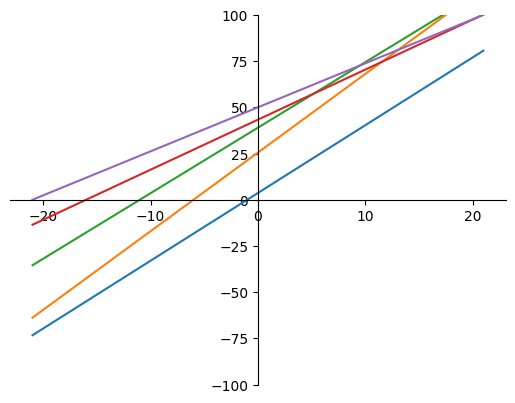

In [8]:
style.use('default')
x = np.arange(-s.max(),s.max(),0.01)
Vmax_intersect = []
Km_intersect = []
mmlines = np.vstack((vm/s,vm)).T
n_int = len(s)*(len(s)-1)//2
Km_int = np.zeros(n_int)
Vmax_int = np.zeros(n_int)

for m, b in mmlines:
  plt.plot(x,m*x+b)

print("Computing {:d} intersections".format(n_int))
for i in range(mmlines.shape[0]):
  for j in range(i):
    m1, b1 = mmlines[i]
    m2, b2 = mmlines[j]
    x = (b2-b1)/(m1-m2)
    y = (b2*m1-b1*m2)/(m1-m2)
    Km_intersect.append(x)
    Vmax_intersect.append(y)
    #print(x,y)
    #pass
    #print(i,j,mmlines[i],mmlines[j])

ax = plt.gca()
ax.axis([-1.1*s.max(),1.1*s.max(),-2*vm.max(),2*vm.max()])
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_xlabel("Km")
#ax.set_ylabel("Vmax")
#ax.set_ylabel?
DL_Km = np.median(Km_intersect)
DL_Vmax = np.median(Vmax_intersect)
print("Median Estimate of Km: {:5.2f}".format(DL_Km)) 
print("Median Estimate of Vmax: {:5.2f}".format(DL_Vmax))  

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

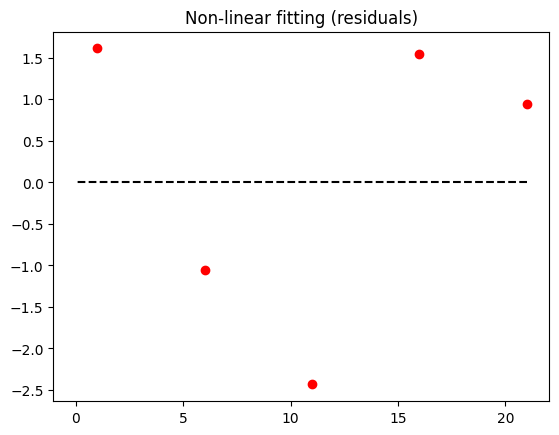

In [10]:
DL_v = MM(DL_Km,DL_Vmax,s)
plt.title("Non-linear fitting (residuals)")
plt.plot(s,DL_v-vm,'ro')
plt.hlines(0,s[-1],0,'k',linestyles="dashed")
plt.ylim(s[0],1.1*v[-1])

Km = 1.925, Vmax= 0.666


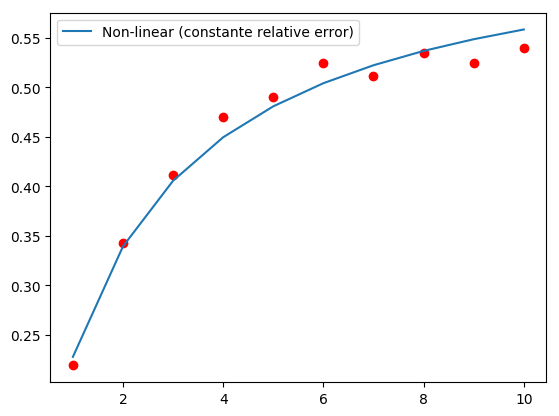

In [164]:
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)


# Non-linear least square fitting (constant relative error)
# Johansen and Lumry
D = (vm*vm / s / s).sum()*vm.sum()-(vm*vm/s).sum()*(vm/s).sum()
NL_Vmax = ((vm*vm / s / s).sum()*(vm*vm).sum()-((vm*vm/s).sum())**2) / D
NL_Km = ((vm*vm).sum()*(vm/s).sum()-(vm*vm/s).sum()*vm.sum()) / D
#plt.plot(s,MM(Km,Vmax,s),label="True")
plt.plot(s,vm,'ro')
plt.plot(s,MM(NL_Km,NL_Vmax,s),label = "Non-linear (constante relative error)")
plt.legend()
#plt.ylim(0,1.1*Vmax)
print("Km = {:5.3f}, Vmax= {:5.3f}".format(NL_Km, NL_Vmax))

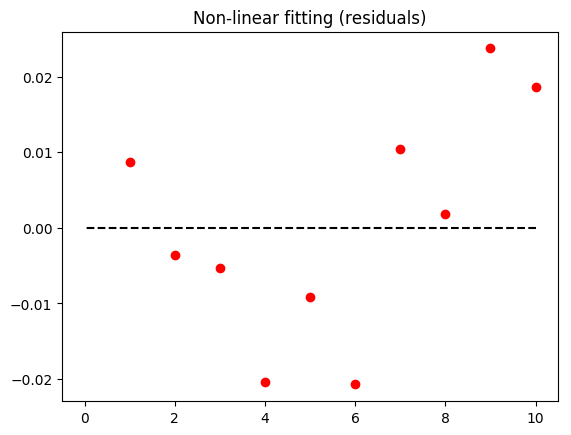

In [181]:
plt.title("Non-linear fitting (residuals)")
plt.plot(s,MM(NL_Km,NL_Vmax,s)-vm,'ro')
plt.hlines(0,10,0,'k',linestyles="dashed")

### Example data
[A]	v1	Mean v	Std v
0	1.000	0.219	0.219	nan
1	2.000	0.343	0.343	nan
2	3.000	0.411	0.411	nan
3	4.000	0.470	0.470	nan
4	5.000	0.490	0.490	nan
5	6.000	0.525	0.525	nan
6	7.000	0.512	0.512	nan
7	8.000	0.535	0.535	nan
8	9.000	0.525	0.525	nan
9	10.000	0.540	0.540	nan

In [5]:
2+2

4